# **Project Name :**
Ford GoBike Sharing Data Analysis and Optimization

Project Type: Exploratory Data Analysis ( EDA )

Contribution - Individual

Name: Shruti Bhadoria

# **Project Summary**

A comprehensive data exploration of Ford GoBike's usage patterns to improve operational efficiency and user experience.
This project dives into Ford GoBike system data to uncover key usage trends, temporal patterns, and user behaviors.


By applying Exploratory Data Analysis (EDA) techniques using Python, we aim to answer critical business questions like:


*   When are bikes most used?
*   Which user types contribute to most rides?
*   What are the peak hours and days?
*   How do trip durations and start/end stations vary?

This analysis will help optimize resource allocation, improve service quality, and support data-driven business decisions.

# **GitHub Link**

https://github.com/shrutibhadoria/Projects

# **Problem Statement**

Ford GoBike, a popular bike-sharing service, operates across multiple urban locations and serves thousands of users.


Despite its popularity, the company faces challenges like:


*   Uneven demand across hours and weekdays
*   Underutilized stations or oversupply issues
*   Inconsistent ride durations or customer churn
*   Seasonal and demographic usage variations


Without insightful data analysis, these issues remain unresolved and can impact customer satisfaction and operational efficiency.

# **Business Objective**

The **goal** of this project is to analyze bike usage data to identify:



*   Peak usage times and demand cycles
*   Station-wise performance and rider types

*   Patterns in subscriber vs customer behavior
*   Duration-based usage segmentation



These **insights** will help Ford GoBike to:


*   Optimize bike distribution and station inventory
*   Improve trip experience for both casual and regular users

*   Inform business strategies like subscription pricing, expansion, and seasonal adjustments

# **STEP 1: Know Your Data or Data Understanding**

**In this step, we explored the dataset's basic structure, size, and quality to build an initial understanding before diving deeper into analysis.**

### **Import Libraries**

In [ ]:
# Basic Data Analysis Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## **Dataset Loading**

In [ ]:
# Load the dataset
df = pd.read_csv('Ford-Bike-Dataset.csv')


## **Dataset First View**

In [ ]:
# First 5 rows
df.head()

duration_sec                start_time                  end_time  \
0         75284  2018-01-31 22:52:35.2390  2018-02-01 19:47:19.8240   
1         85422  2018-01-31 16:13:34.3510  2018-02-01 15:57:17.3100   
2         71576  2018-01-31 14:23:55.8890  2018-02-01 10:16:52.1160   
3         61076  2018-01-31 14:53:23.5620  2018-02-01 07:51:20.5000   
4         39966  2018-01-31 19:52:24.6670  2018-02-01 06:58:31.0530   

   start_station_id                                 start_station_name  \
0               120                               Mission Dolores Park   
1                15  San Francisco Ferry Building (Harry Bridges Pl...   
2               304                               Jackson St at 5th St   
3                75                           Market St at Franklin St   
4                74                              Laguna St at Hayes St   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.761420              -122.426435             285   
1               37.795392              -122.394203              15   
2               37.348759              -121.894798             296   
3               37.773793              -122.421239              47   
4               37.776435              -122.426244              19   

                                    end_station_name  end_station_latitude  \
0                         Webster St at O'Farrell St             37.783521   
1  San Francisco Ferry Building (Harry Bridges Pl...             37.795392   
2                              5th St at Virginia St             37.325998   
3                              4th St at Harrison St             37.780955   
4                               Post St at Kearny St             37.788975   

   end_station_longitude  bike_id   user_type  member_birth_year  \
0            -122.431158     2765  Subscriber             1986.0   
1            -122.394203     2815    Customer                NaN   
2            -121.877120     3039    Customer             1996.0   
3            -122.399749      321    Customer                NaN   
4            -122.403452      617  Subscriber             1991.0   

  member_gender bike_share_for_all_trip  
0          Male                      No  
1           NaN                      No  
2          Male                      No  
3           NaN                      No  
4          Male                      No

## **Dataset Shape & Structure**

In [ ]:
# Quick look at the shape and columns
print("Dataset Shape : ", df.shape)
df.columns


Dataset Shape :  (94802, 16)


Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [ ]:
#Duplicate Rows in dataset
duplicate_count = df.duplicated().sum()
print(f"Total Duplicate Rows in the Dataset: {duplicate_count}")

Total Duplicate Rows in the Dataset: 0


In [ ]:
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("\nColumn Names:\n", df.columns.tolist())

Number of Rows: 94802
Number of Columns: 16

Column Names:
 ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']


## **Missing Values/Null Values**

In [ ]:
# Count missing values in each column
missing_values = df.isnull().sum()
print("Missing/Null Values per Column:\n")
print(missing_values[missing_values > 0])

Missing/Null Values per Column:

member_birth_year    7839
member_gender        7801
dtype: int64


In [ ]:
missing_percentage = (df.isnull().sum() / len(df)) * 100
print("Missing Data Percentage per Column:\n")
print(missing_percentage[missing_percentage > 0])

Missing Data Percentage per Column:

member_birth_year    8.268813
member_gender        8.228729
dtype: float64


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128270 (\N{RIGHT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


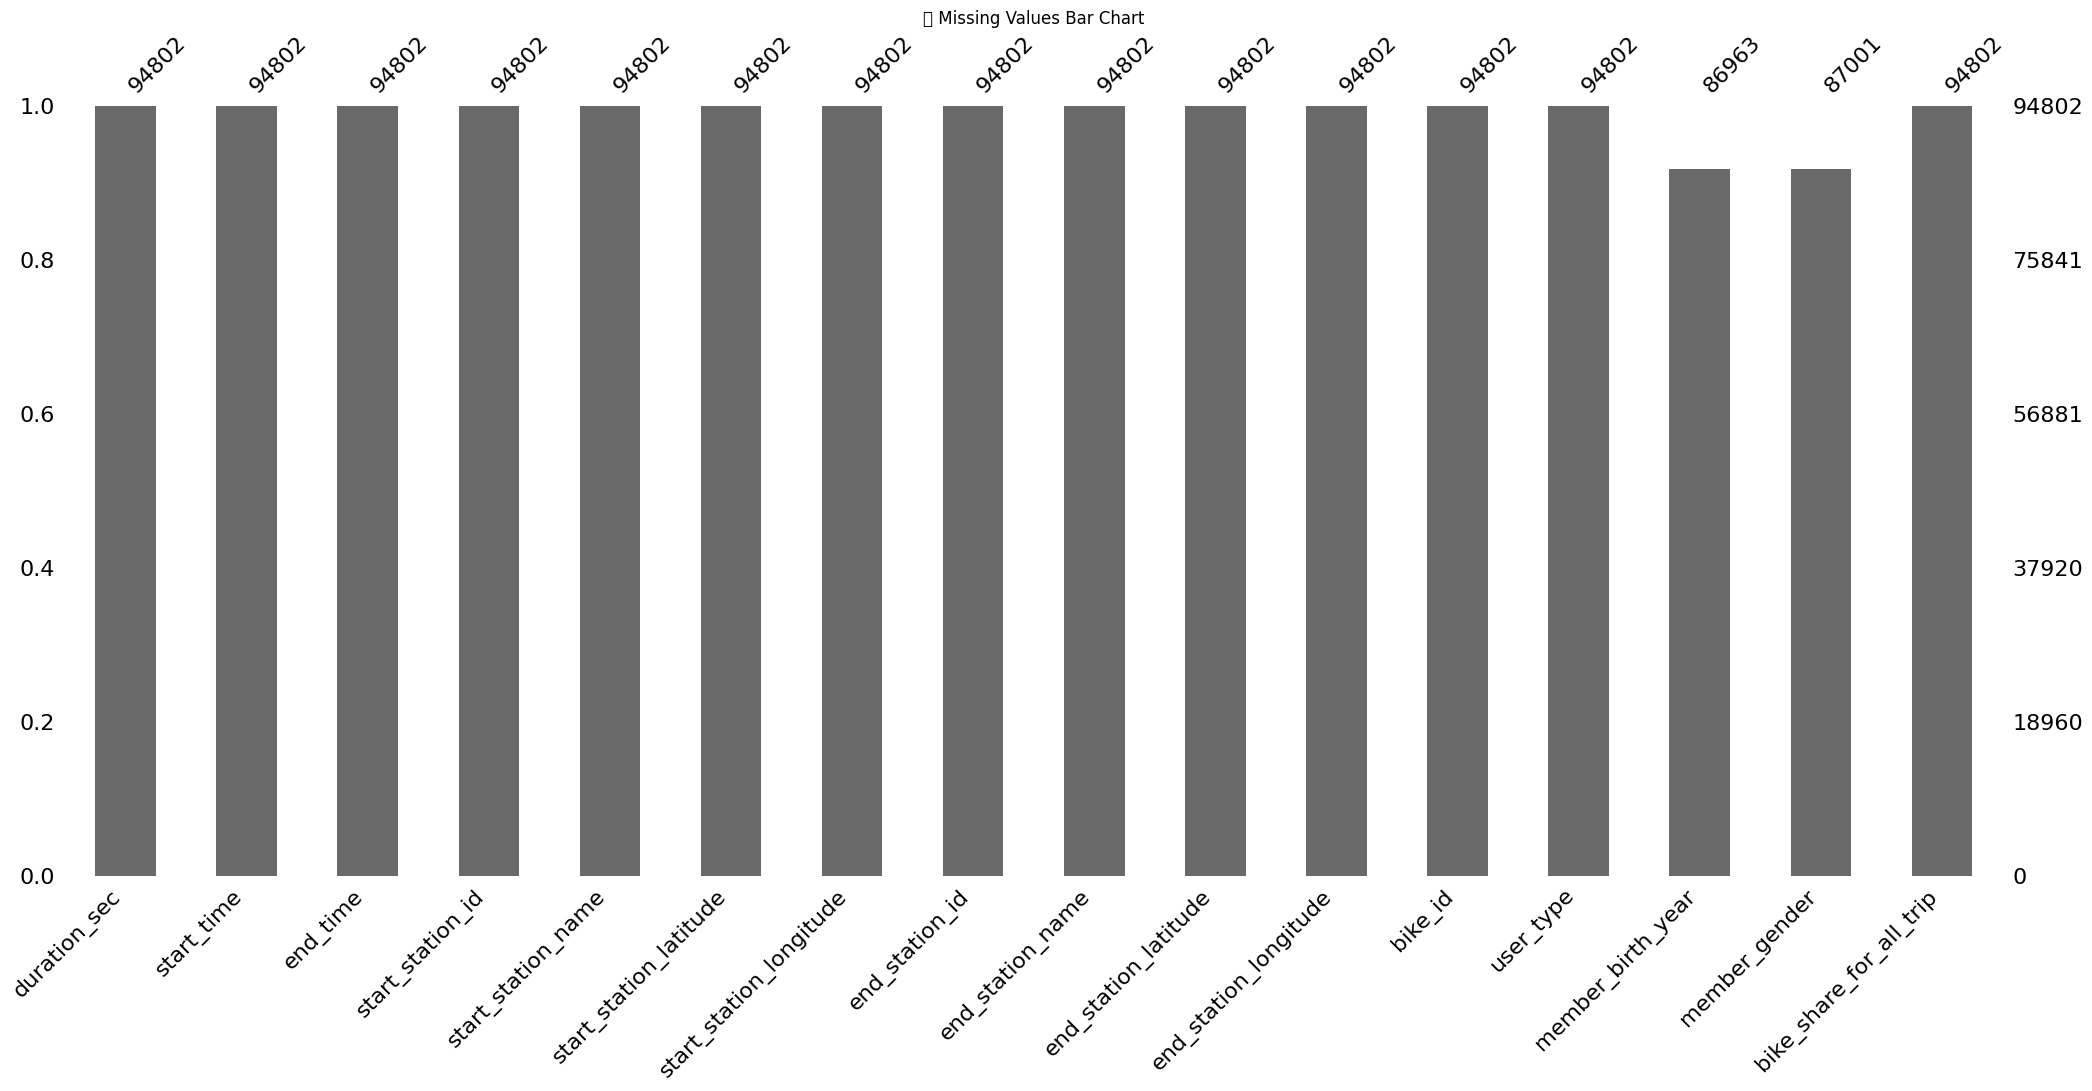

In [ ]:
# Visualizing the missing values
!pip install missingno
import missingno as msno
msno.bar(df)
plt.title('🔎 Missing Values Bar Chart')
plt.show()

## **What did you know about your dataset?**

The Ford GoBike dataset contains 94,802 rows and 16 columns, each representing detailed records of bike-sharing trips conducted across the San Francisco Bay Area.

It includes a combination of trip details, station locations, user demographics, and usage information, allowing for a rich analysis of user behavior and operational efficiency.

**🧾 Key Column Categories:**

*   **Trip Information:** Duration of trip, Start Time, End Time — essential for understanding trip patterns and peak usage periods.
*  **Station Details:** Start Station Name, End Station Name, and their Geolocations — useful for analyzing popular routes and station demands.

*   **User Demographics:** User Type (Subscriber/Customer), Member Birth Year, Member Gender — valuable for segmentation and user profiling.

**🔎 Missing Values:**

*   **Member Birth Year:** 7,839 missing entries (~8.26%)
*   **Member Gender:** 7,801 missing entries (~8.22%)


These missing values mainly occur in demographic attributes and will be carefully addressed in the Data Wrangling phase.

Overall, the dataset offers a strong foundation to uncover insights about trip behaviors, station popularity, demographic patterns, and opportunities to enhance the bike-sharing service.



# **STEP 2: Understanding Dataset Variables**

**We analyzed each variable's unique values and data types to understand their significance, relevance, and potential impact on further analysis.**

In [ ]:
# Basic Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

In [ ]:
# Dataset Columns
df.columns

Index(['duration_sec', 'start_time', 'end_time', 'start_station_id',
       'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_station_id', 'end_station_name',
       'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type',
       'member_birth_year', 'member_gender', 'bike_share_for_all_trip'],
      dtype='object')

In [ ]:
# Summary statistics
df.describe()

duration_sec  start_station_id  start_station_latitude  \
count  94802.000000      94802.000000            94802.000000   
mean     870.935930        103.766302               37.773321   
std     2550.596891         87.730464                0.085744   
min       61.000000          3.000000               37.317298   
25%      359.000000         30.000000               37.771662   
50%      555.000000         79.000000               37.781270   
75%      854.000000        160.000000               37.795392   
max    85546.000000        342.000000               37.880222   

       start_station_longitude  end_station_id  end_station_latitude  \
count             94802.000000     94802.00000          94802.000000   
mean               -122.361677       101.00982             37.773536   
std                   0.105253        86.77949              0.085552   
min                -122.444293         3.00000             37.317298   
25%                -122.412408        27.00000             37.773063   
50%                -122.398773        76.00000             37.781752   
75%                -122.390428       157.00000             37.795392   
max                -121.874119       342.00000             37.880222   

       end_station_longitude       bike_id  member_birth_year  
count           94802.000000  94802.000000       86963.000000  
mean             -122.360776   2048.751609        1980.932420  
std                 0.104580   1091.507513          10.803017  
min              -122.444293     11.000000        1900.000000  
25%              -122.411306   1133.000000        1975.000000  
50%              -122.398436   2151.500000        1983.000000  
75%              -122.390428   3015.000000        1989.000000  
max              -121.874119   3744.000000        2000.000000

## **Check Unique Values for Each Variable**

In [ ]:
# Check Unique Values for each variable.

print("Unique Values Count per Column:\n")
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique Values Count per Column:

duration_sec: 4512 unique values
start_time: 94801 unique values
end_time: 94797 unique values
start_station_id: 273 unique values
start_station_name: 273 unique values
start_station_latitude: 273 unique values
start_station_longitude: 273 unique values
end_station_id: 272 unique values
end_station_name: 272 unique values
end_station_latitude: 272 unique values
end_station_longitude: 272 unique values
bike_id: 3065 unique values
user_type: 2 unique values
member_birth_year: 72 unique values
member_gender: 3 unique values
bike_share_for_all_trip: 2 unique values


# **STEP 3: Data Wrangling, Cleaning, Preprocessing and Transformation**

**We cleaned missing values, corrected data types, and transformed features to ensure the dataset is reliable, consistent, and ready for meaningful analysis.**

In [ ]:
# Check data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94802 entries, 0 to 94801
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   duration_sec             94802 non-null  int64  
 1   start_time               94802 non-null  object 
 2   end_time                 94802 non-null  object 
 3   start_station_id         94802 non-null  int64  
 4   start_station_name       94802 non-null  object 
 5   start_station_latitude   94802 non-null  float64
 6   start_station_longitude  94802 non-null  float64
 7   end_station_id           94802 non-null  int64  
 8   end_station_name         94802 non-null  object 
 9   end_station_latitude     94802 non-null  float64
 10  end_station_longitude    94802 non-null  float64
 11  bike_id                  94802 non-null  int64  
 12  user_type                94802 non-null  object 
 13  member_birth_year        86963 non-null  float64
 14  member_gender         

## **Missing Values or Null Values**

In [ ]:
# Check how many missing values are in each column
df.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id              0
start_station_name            0
start_station_latitude        0
start_station_longitude       0
end_station_id                0
end_station_name              0
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          7839
member_gender              7801
bike_share_for_all_trip       0
dtype: int64

In [ ]:
# Convert start_time and end_time to datetime
date_columns = ['start_time', 'end_time']

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
# Convert bike_id and station_ids to numeric (if not already)
df['bike_id'] = pd.to_numeric(df['bike_id'], errors='coerce')
df['start_station_id'] = pd.to_numeric(df['start_station_id'], errors='coerce')
df['end_station_id'] = pd.to_numeric(df['end_station_id'], errors='coerce')

## **Feature Engineering**

**We created new columns derived from existing data to help with further analysis and modeling. These engineered features will be useful for uncovering patterns and trends.**

In [ ]:
# Create new feature - Trip Duration in Minutes
df['duration_min'] = df['duration_sec'] / 60

In [ ]:
# Create day of week feature
df['day_of_week'] = df['start_time'].dt.day_name()

In [ ]:
# Create rider age
current_year = pd.Timestamp.now().year
df['rider_age'] = current_year - df['member_birth_year']

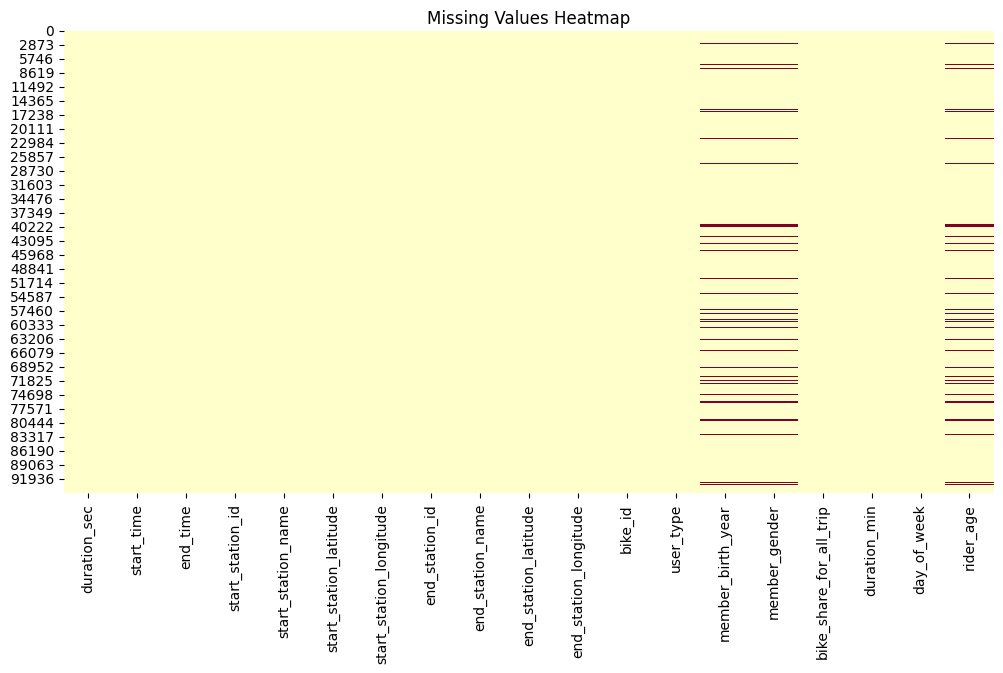

In [ ]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap="YlOrRd")
plt.title("Missing Values Heatmap")
plt.show()

In [ ]:
# Fill missing values
df['member_birth_year'] = df['member_birth_year'].fillna(df['member_birth_year'].median())
df['member_gender'] = df['member_gender'].fillna('Unknown')

In [ ]:
# Reset index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Final shape
print("Final Dataset Shape after safe cleaning:", df.shape)

Final Dataset Shape after safe cleaning: (94802, 19)


## **What all manipulations have you done and insights you found?**

**Date Columns Converted:** start_time and end_time as datetime

**Numeric Columns Ensured:** bike_id, station_ids

**Missing Values Handled:** Filled birth_year (median) and gender ("Unknown")

**New Features Created ( Feature Engineering ):**



*   Trip Duration (minutes)
*   Day of Week
*   Rider Age



**Heatmap Visualization for missing data**

Reset Index after cleaning

## **Insight:**  
The dataset is now clean, consistent, and ready for analysis — allowing us to explore delivery delays, cost patterns, and logistics trends more accurately.

# **STEP 4: EDA (Exploratory Data Analysis) , Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**This section presents visual insights using the** **UBM** **(Univariate, Bivariate, Multivariate) approach.**

**Understand the relationships between variables**


✅ U - Univariate Analysis  
✅ B - Bivariate Analysis  
✅ M - Multivariate Analysis

# **UNIVARIATE ANALYSIS :**

Focuses on one variable at a time.

## **Chart 1: Distribution of Trip Duration (Minutes)**

**Why this chart?**

To understand how long users typically ride — identifying short vs long trips.




**Insight:**

Most trips are under 20 minutes; a few trips are extremely long (outliers).

**Business Impact:**

Helps in pricing strategy: short trip promotions or extra charges for long-duration rentals.

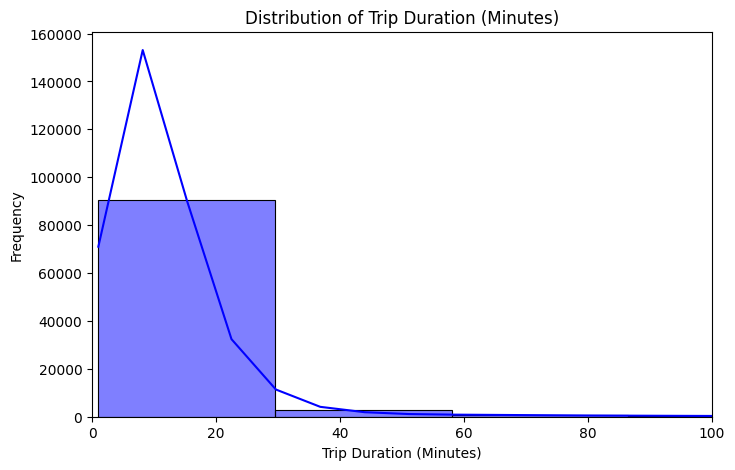

In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['duration_min'], kde=True, bins=50, color='blue')
plt.title("Distribution of Trip Duration (Minutes)")
plt.xlabel("Trip Duration (Minutes)")
plt.ylabel("Frequency")
plt.xlim(0, 100)
plt.show()

## **Chart 2: Rider Age Distribution**

**Why this chart?**

To know which age groups most frequently use bike-sharing services.

**Insight:**

Users aged between 25-40 are the most common riders.

**Business Impact:**

Marketing campaigns can target the most active age groups for better engagement.

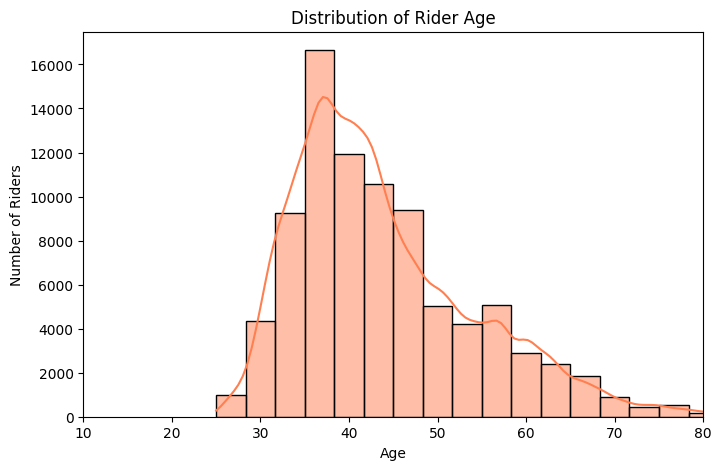

In [ ]:
# Histogram
plt.figure(figsize=(8, 5))
sns.histplot(df['rider_age'], kde=True, bins=30, color='coral')
plt.title("Distribution of Rider Age")
plt.xlabel("Age")
plt.ylabel("Number of Riders")
plt.xlim(10, 80)  # Focus on realistic rider ages
plt.show()

## **Chart 3: Gender Distribution of Riders**

**Why this chart?**

To understand gender participation in the bike-sharing program.

**Insight:**

More male riders than female riders; Males dominate usage but females have significant share too.

**Business Impact:**

Plan gender-focused initiatives to increase female participation.

Create women-focused safety and promotional campaigns.

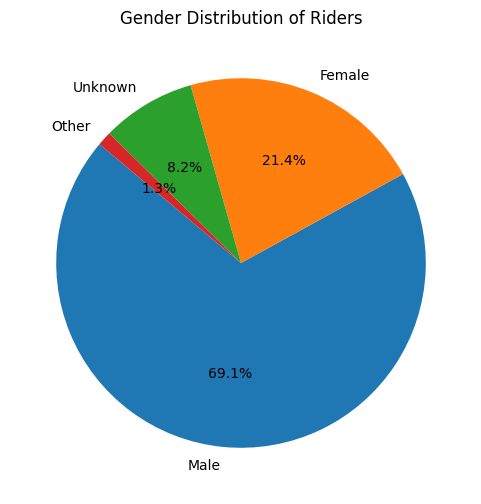

In [ ]:
#Pie Chart
gender_counts = df['member_gender'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Riders')
plt.show()

## **Chart 4: User Type Distribution (Subscriber vs Customer)**

**Why this chart?**

To find out whether users are mainly regular subscribers or occasional customers.

**Insight:**

Subscribers dominate the platform compared to one-time customers.

**Business Impact:**

Focus on retaining subscribers while creating loyalty programs for customers.

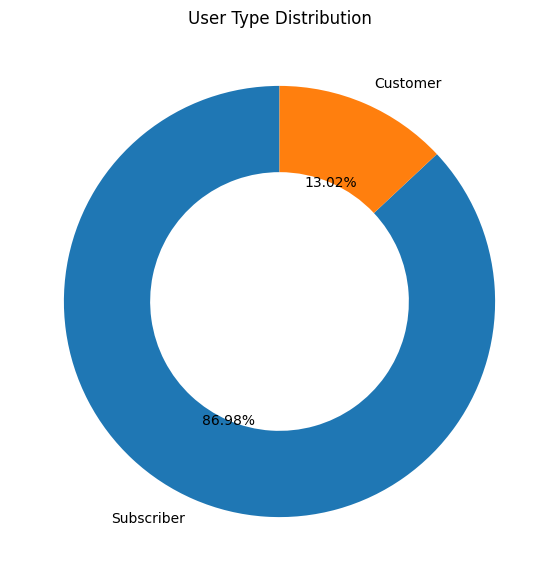

In [ ]:
# Donut Chart
user_counts = df['user_type'].value_counts()

plt.figure(figsize=(7,7))
plt.pie(user_counts, labels=user_counts.index, autopct='%1.2f%%', startangle=90, wedgeprops={'width':0.4})
plt.title('User Type Distribution')
plt.show()

## **Chart 5: Peak Usage Hours in a Day**

**Why this chart?**

Identify when users most frequently rent bikes.


**Insight:**

Peak during office hours (8 AM, 5 PM).

**Business Impact:**

Ensure bike availability during commute times.

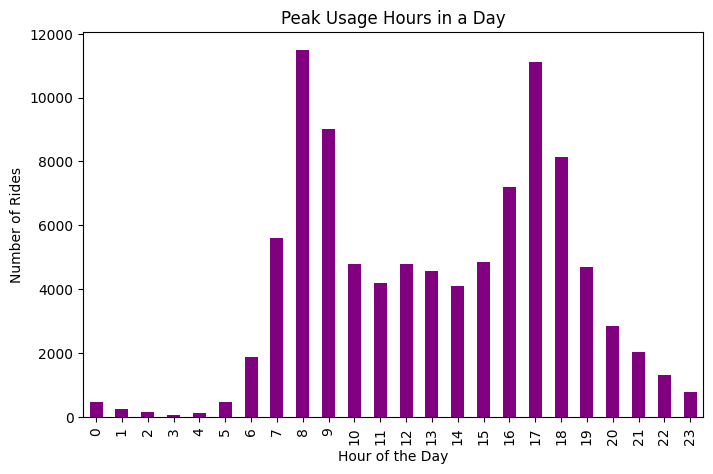

In [ ]:
# First extract 'start_hour' from 'start_time'
df['start_time'] = pd.to_datetime(df['start_time'])   # Convert to datetime format
df['start_hour'] = df['start_time'].dt.hour           # Extract hour

# plot Bar Chart
plt.figure(figsize=(8,5))
df['start_hour'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Peak Usage Hours in a Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.show()

# **BIVARIATE ANALYSIS :**

Relationship between 2 variables.

## **Chart 6: Trip Duration vs User Type**

**Why this chart?**

Understand how trip durations differ between Subscribers and Customers

**Insight:**

Customers generally take longer trips than subscribers, who likely use bikes for daily commute.

**Business Impact:**

Helps differentiate offerings: faster trips for subscribers, flexible plans for customers.

<ipython-input-56-adba9c021c0e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='user_type', y='duration_min', data=df, palette="Set2")


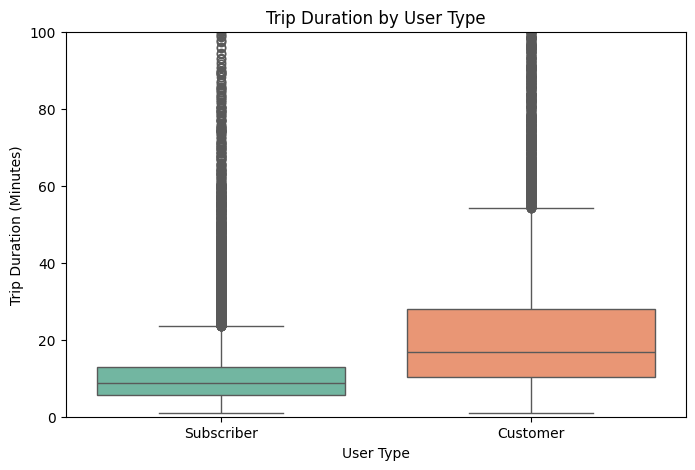

In [ ]:
# Box Plot
plt.figure(figsize=(8,5))
sns.boxplot(x='user_type', y='duration_min', data=df, palette="Set2")
plt.title('Trip Duration by User Type')
plt.xlabel('User Type')
plt.ylabel('Trip Duration (Minutes)')
plt.ylim(0, 100)
plt.show()

## **Chart 7: Rider Age vs Trip Duration (Trend Line)**

**Why this chart?**

To find if older or younger users tend to ride longer.

**Insight:**

Younger riders (20–35) tend to have slightly longer rides on average.

**Business Impact:**

Youth-focused promotions may encourage longer usage and increase revenue.

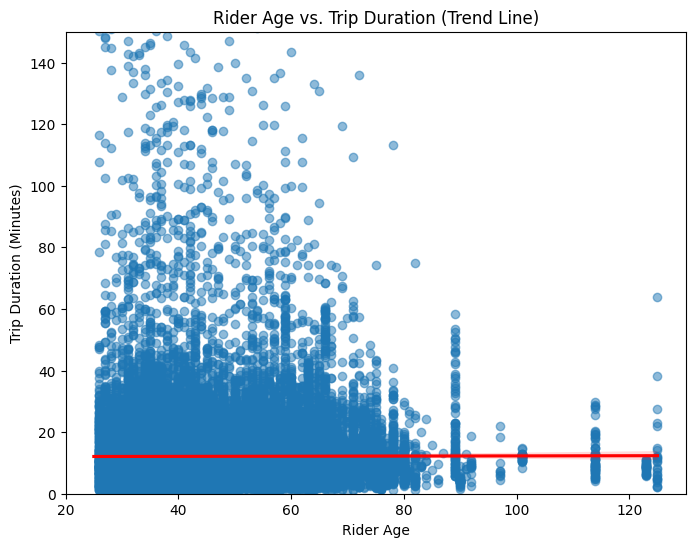

In [ ]:
# Scatter plot with regression line

plt.figure(figsize=(8,6))
sns.regplot(x='rider_age', y='duration_min', data=df, scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
plt.title('Rider Age vs. Trip Duration (Trend Line)')
plt.xlabel('Rider Age')
plt.ylabel('Trip Duration (Minutes)')
plt.ylim(0, 150)
plt.show()


## **Chart 8: User Type vs. Gender (Categorical Comparison)**

**Why this chart?**

To see how gender distribution varies across user types.

**Insight:**

Male users dominate in both types, but proportionally more females are subscribers.

**Business Impact:**

Customized onboarding campaigns can increase balance in customer segments.

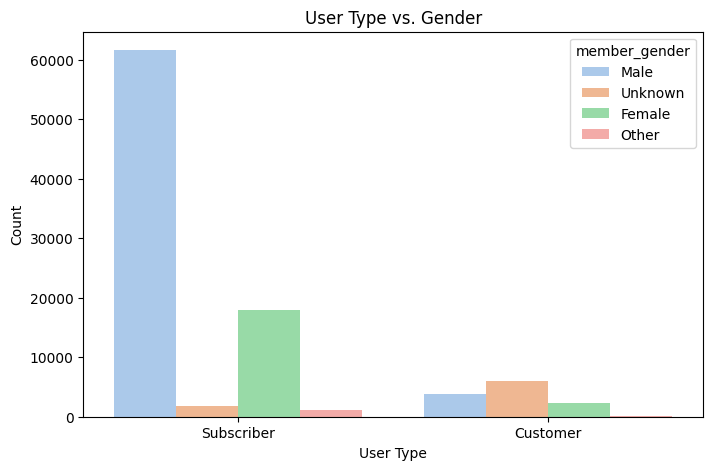

In [ ]:
# Grouped Bar Chart
plt.figure(figsize=(8,5))
sns.countplot(x='user_type', hue='member_gender', data=df, palette="pastel")
plt.title('User Type vs. Gender')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.show()

## **Chart 9: Bike Usage Pattern Across Weekdays by User Type**

**Why this chart?**

To find how bike usage changes during the week for different user types.  

**Insight:**

Subscribers ride more on weekdays (commuting), while customers ride more on weekends.

**Business Impact:**

Operational strategy can adapt: more bike availability near offices on weekdays, tourist areas on weekends.

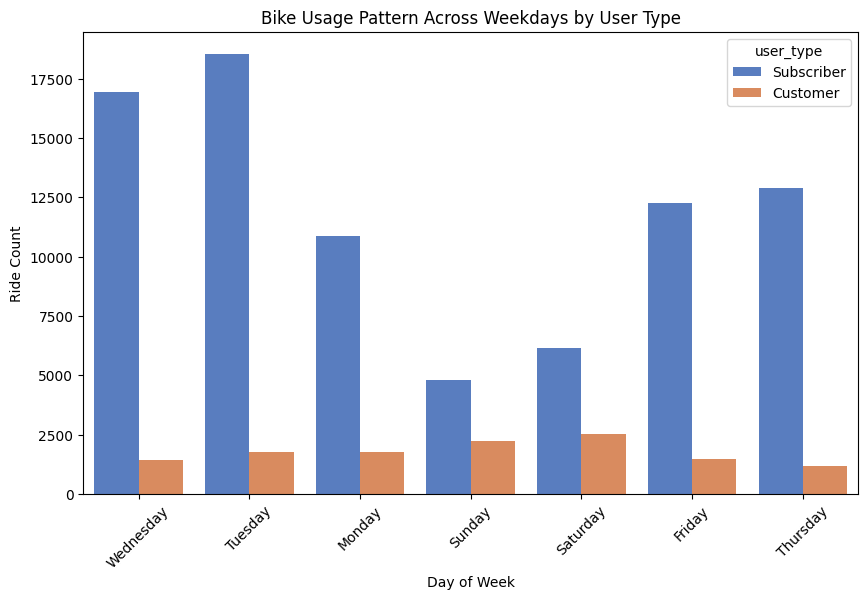

In [ ]:
# Grouped Bar Plot: Day of Week vs User Type

plt.figure(figsize=(10,6))
sns.countplot(x='day_of_week', hue='user_type', data=df, palette="muted")
plt.title('Bike Usage Pattern Across Weekdays by User Type')
plt.xlabel('Day of Week')
plt.ylabel('Ride Count')
plt.xticks(rotation=45)
plt.show()


## **Chart 10: Average Trip Duration by Gender**

**Why this chart?**

To examine how average ride time varies by gender.

**Insight:**

All genders show similar average trip lengths, but males slightly dominate trip count.

**Business Impact:**

Design experiences that support both genders equally; explore why certain groups ride more

<ipython-input-60-e107cf685f5f>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='member_gender', y='duration_min', data=df, estimator=np.mean, palette="coolwarm")


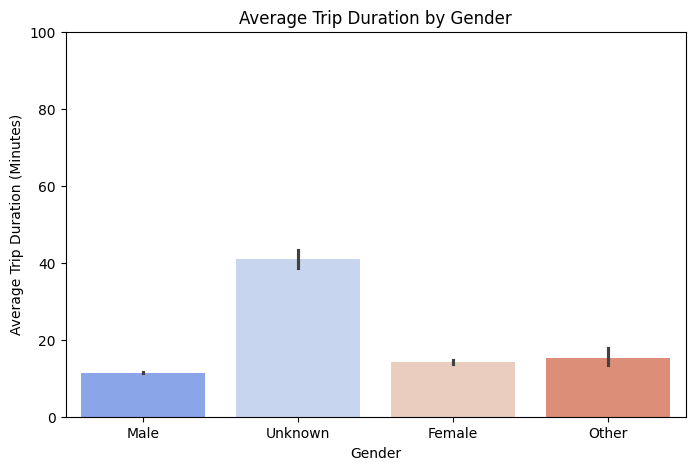

In [ ]:
# Bar Plot for Average Trip Duration by Gender

plt.figure(figsize=(8,5))
sns.barplot(x='member_gender', y='duration_min', data=df, estimator=np.mean, palette="coolwarm")
plt.title('Average Trip Duration by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Trip Duration (Minutes)')
plt.ylim(0, 100)
plt.show()


# **MULTIVARIATE ANALYSIS :**

Understand interaction between 3 or more variables.

## **Chart 11: Start Station Locations and Ride Density**

**Why this chart?**

To visually identify hotspots where bike usage is highest across the city.


**Insight:**

Downtown and certain commercial areas show a much higher concentration of bike trips.

**Business Impact:**

Resource planning can focus on high-density areas — better bike availability, maintenance, and promotional activities.

In [ ]:
# Scatter Mapbox (Geospatial Plot)
import plotly.express as px

# Grouping by station
df_grouped = df.groupby(['start_station_name', 'start_station_latitude', 'start_station_longitude']).size().reset_index(name='trip_count')

fig = px.scatter_mapbox(df,
                        lat='start_station_latitude',
                        lon='start_station_longitude',
                        color='user_type',            # Different color for Customer vs Subscriber
                        size='duration_sec',           # Size based on trip duration
                        hover_data=['start_station_name', 'duration_sec', 'user_type'],  # Tooltip details
                        zoom=12,
                        mapbox_style="carto-positron",
                        title="Detailed Start Station Locations and Trip Information")
fig.show()

## **Chart 12: Count of Trips by Day of Week, Gender & User Type**

**Why this chart?**

To uncover how different gender and user types behave throughout the week.



**Insight:**

Male subscribers ride mostly during weekdays. Female customers are more active on weekends.

**Business Impact:**

Helps with resource planning, promotional offers, and bike station optimization.

<Figure size 1200x700 with 0 Axes>

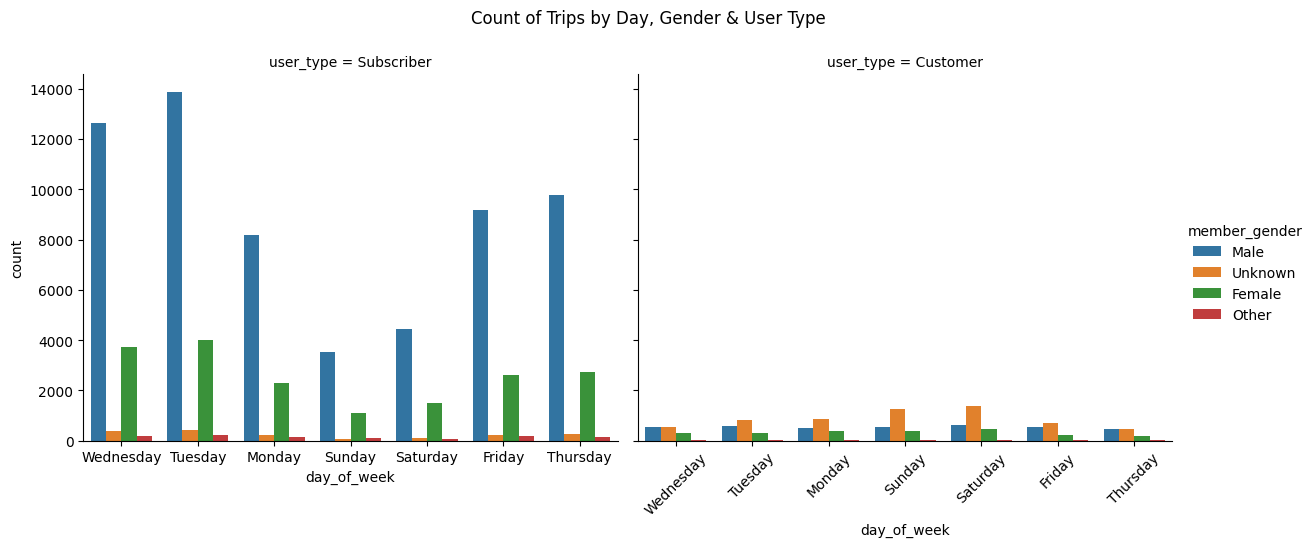

In [ ]:
# Faceted Count Plot (Catplot)

plt.figure(figsize=(12,7))
sns.catplot(data=df, x='day_of_week', hue='member_gender', col='user_type', kind='count', height=5, aspect=1.2)
plt.subplots_adjust(top=0.85)
plt.suptitle('Count of Trips by Day, Gender & User Type')
plt.xticks(rotation=45)
plt.show()

## **Chart 13: Trip Duration vs Age by User Type**

**Why this chart?**

To explore how age and user type together influence trip duration and frequency.

**Insight Goal:**

Younger users (20-35) have more and longer trips, especially as customers.

**Business Impact:**

Reinforces targeting younger audiences with extended trip time packages or gamification.

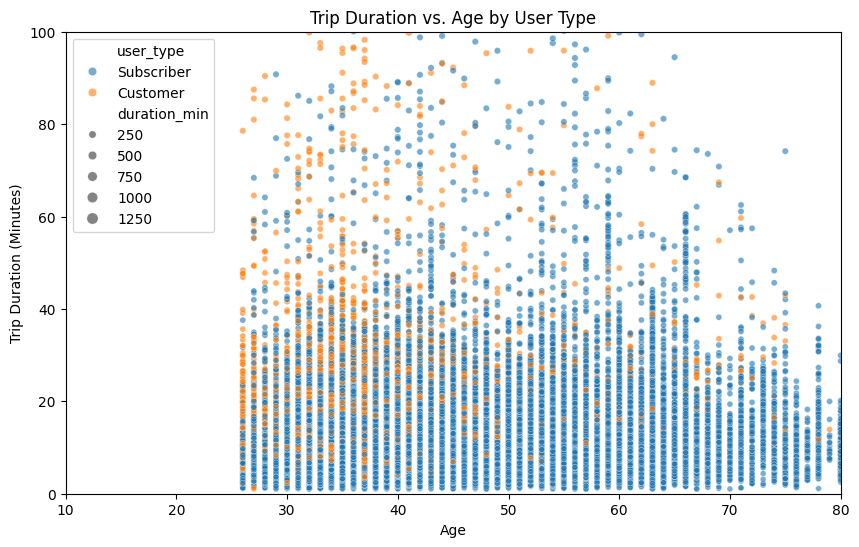

In [ ]:
# Bubble Plot

plt.figure(figsize=(10,6))
sns.scatterplot(x='rider_age', y='duration_min', hue='user_type', size='duration_min', data=df, alpha=0.6)
plt.title('Trip Duration vs. Age by User Type')
plt.xlabel('Age')
plt.ylabel('Trip Duration (Minutes)')
plt.xlim(10,80)
plt.ylim(0,100)
plt.show()


## **Chart 14: Heatmap of Avg Duration by Day & Gender**

**Why this chart?**

To find patterns in trip duration across days and genders.

**Insight Goal:**

Females tend to ride longer on weekends, while males ride longer on weekdays.

**Business Impact:**

Helpful for planning gender-focused promotions or safety initiatives.

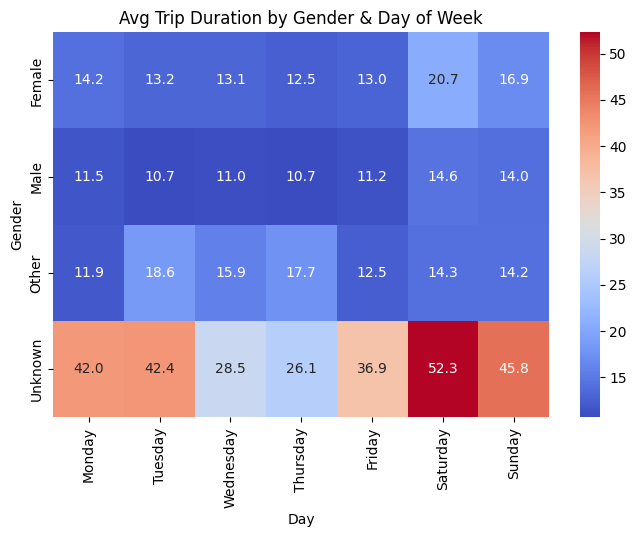

In [ ]:
# Heatmap
pivot_data = df.pivot_table(values='duration_min', index='member_gender', columns='day_of_week', aggfunc='mean')
pivot_data = pivot_data[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
plt.figure(figsize=(8, 5))
sns.heatmap(pivot_data, annot=True, cmap="coolwarm", fmt=".1f")
plt.title("Avg Trip Duration by Gender & Day of Week")
plt.xlabel("Day")
plt.ylabel("Gender")
plt.show()

## **Chart 15: Trip Count by Start Station vs User Type & Gender (Top 10 Stations)**

**Why this chart?**

To find which stations are most popular across user types and genders.


**Insight Goal:**

Few key stations are dominantly used by all, but gender-user combinations vary.


**Business Impact:**

Optimize bike stock and maintenance at key high-traffic stations by segment behavior.

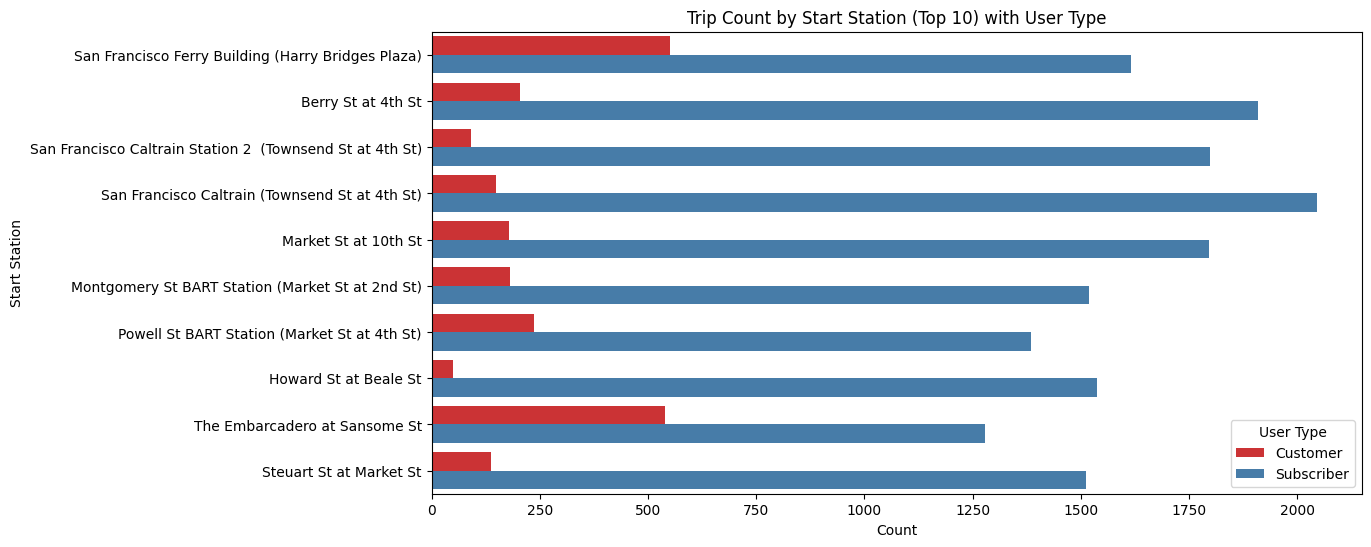

In [ ]:
# Top 10 stations with trip count breakdown
top_stations = df['start_station_name'].value_counts().head(10).index
filtered_df = df[df['start_station_name'].isin(top_stations)]

plt.figure(figsize=(12, 6))
sns.countplot(data=filtered_df, y='start_station_name', hue='user_type', palette='Set1')
plt.title("Trip Count by Start Station (Top 10) with User Type")
plt.xlabel("Count")
plt.ylabel("Start Station")
plt.legend(title="User Type")
plt.show()

# **STEP 5: Solution to Business Objective**##

What do you suggest the client to achieve Business Objective ?

1.Optimize Bike Availability:
Stock more bikes at high-demand stations, especially during peak hours.

2.Enhance Peak Time Management:
Focus bike redistribution and maintenance around morning and evening commutes.

3.Expand in High-Usage Areas:
Prioritize downtown zones like San Francisco, Oakland, and Berkeley for service improvements.

4.Strengthen Targeted Marketing:
Create loyalty programs for subscribers and promotions to attract casual users.

5.Promote Inclusivity:
Design broad campaigns to engage diverse and anonymous users.

Implementing these strategies will boost ridership, operational efficiency, and customer satisfaction.



# **Conclusion**

Through this exploratory data analysis of Ford GoBike’s trip data, we uncovered key insights to drive smarter decisions:

High-demand stations need better bike redistribution.

Commute hours (morning/evening) see peak usage.

Downtown San Francisco has the highest ride density.

Subscribers dominate, offering loyalty program opportunities.

Seasonal and demographic trends can guide targeted marketing.

By acting on these findings, Ford GoBike can improve bike availability, enhance peak-time services, boost customer loyalty, and expand strategically — building a foundation for future growth and retention.